In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
pd.options.display.max_columns = None #显示完整打印数据
pd.options.display.max_rows = None
plt.rcParams['figure.dpi'] = 50 # 调节图片分辨率，dpi
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('GZO.xlsx')

In [3]:
data.head()

,BandGap,Transmittance,Resistivity
0,3.150,80.0,0.00280
1,3.240,82.0,0.00130
2,3.270,81.0,0.01200
3,3.356,87.0,0.00353
4,3.347,84.0,0.00351


In [4]:
data.shape

(36, 3)

In [5]:
data.isnull().sum()

BandGap          0
Transmittance    0
Resistivity      0
dtype: int64

In [6]:
# 分离特征和标签
x = data.drop(['BandGap'],axis=1)
y = data['BandGap']

In [7]:
# 数据分割
# 划分训练集，测试集，设置随机种子，保证实验能够复现
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.27,
                                                    random_state=73)

In [8]:
# 评分
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn import metrics
def try_different_method(model):  
    model.fit(x_train,y_train)
    print('训练集集')
    y_predict0 = model.predict(x_train) 
    print('MSE值为:',mean_squared_error(y_train,y_predict0))
    print('MAE值为:',mean_absolute_error(y_train,y_predict0))
    print('RMSE值为:',np.sqrt(metrics.mean_squared_error(y_train, y_predict0)))  
    print('MAPE值为:',np.mean(abs((y_train- y_predict0)/y_test)))
    print('R方值为:', metrics.r2_score(y_train, y_predict0))
    
    
    print('测试集')
    y_predict = model.predict(x_test) 
    print('MSE值为:',mean_squared_error(y_test,y_predict))
    print('MAE值为:',mean_absolute_error(y_test,y_predict))
    print('RMSE值为:',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  
    print('MAPE值为:',np.mean(abs((y_test- y_predict)/y_test)))
    print('R方值为:', metrics.r2_score(y_test, y_predict))


In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

model_RF = ensemble.RandomForestRegressor(random_state=50,
                                          max_depth=5)

model_XGB = xgb.XGBRegressor(random_state=50,
                             learning_rate=0.3,
                            n_estimators=20,
                             max_depth=6)
            
model_LGB = lgb.LGBMRegressor(random_state=50,
                              learning_rate=0.2,
                                n_estimators=20,
                                  max_depth=6)

In [10]:
# 输出评分
print('线性回归评分如下：')
try_different_method(model_LR)
print("----------------------------")
print('随机森林模型评分如下：')
try_different_method(model_RF)
print("----------------------------")
print('XGboost模型评分如下：')
try_different_method(model_XGB)
print("----------------------------")
print('lightgbm模型评分如下：')
try_different_method(model_LGB)

线性回归评分如下：
训练集集
MSE值为: 0.019297626494135404
MAE值为: 0.1126775724481571
RMSE值为: 0.1389158971973165
MAPE值为: nan
R方值为: 0.19038413509120844
测试集
MSE值为: 0.015349689227069526
MAE值为: 0.10626748838364194
RMSE值为: 0.1238938627498131
MAPE值为: 0.030989876469355672
R方值为: 0.3639620115173051
----------------------------
随机森林模型评分如下：
训练集集
MSE值为: 0.0027613306614034513
MAE值为: 0.0371563978937728
RMSE值为: 0.052548364973645484
MAPE值为: nan
R方值为: 0.8841506693887597
测试集
MSE值为: 0.005991455431653665
MAE值为: 0.05801466309523771
RMSE值为: 0.07740449232217511
MAPE值为: 0.017116587600112598
R方值为: 0.7517348263890391
----------------------------
XGboost模型评分如下：
训练集集
MSE值为: 0.0005745452069931153
MAE值为: 0.012780075880197353
RMSE值为: 0.023969672650937794
MAPE值为: nan
R方值为: 0.9758954338332595
测试集
MSE值为: 0.009719977459596496
MAE值为: 0.07667844257354735
RMSE值为: 0.0985899460370909
MAPE值为: 0.022495875301042075
R方值为: 0.5972377798635619
----------------------------
lightgbm模型评分如下：
训练集集
MSE值为: 0.023835534023669027
MAE值为: 0.13647632827984507
R

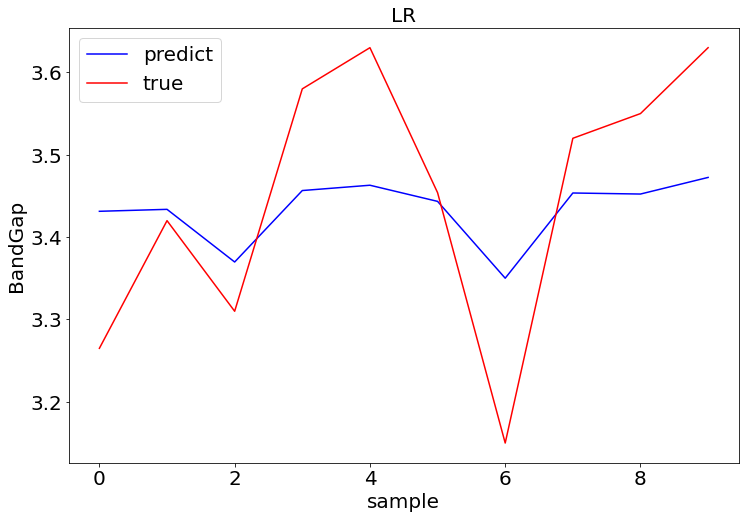

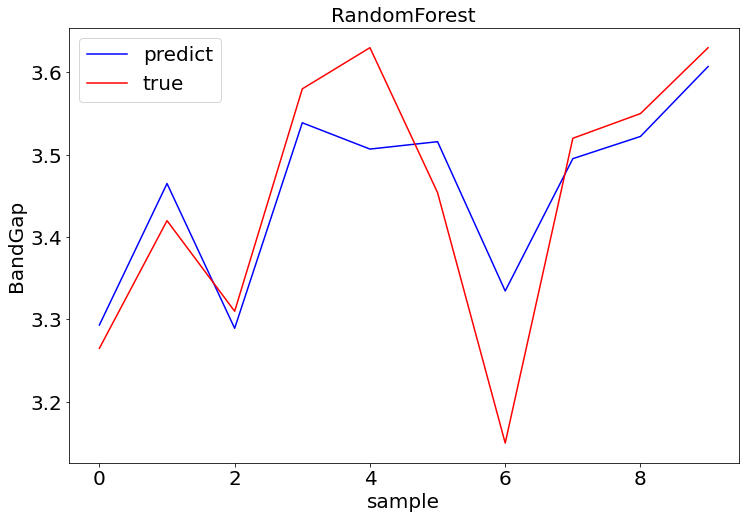

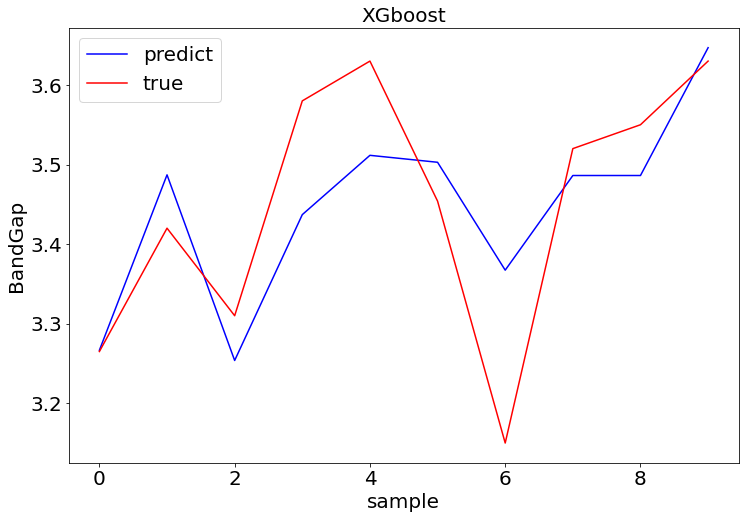

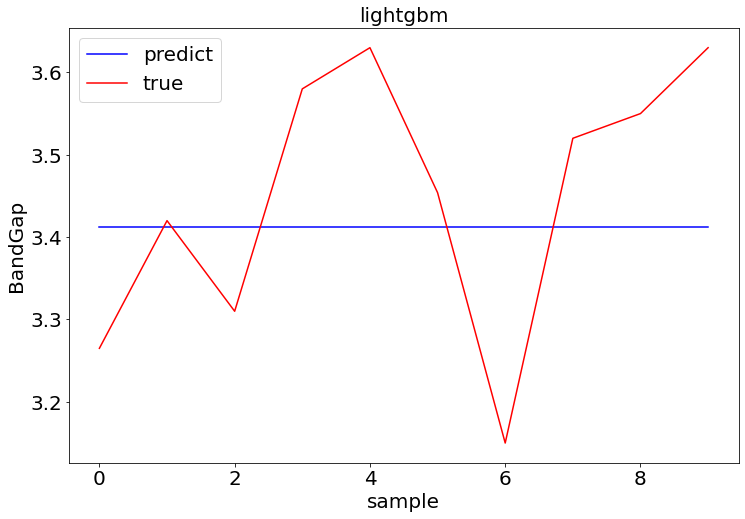

In [11]:
import matplotlib.pyplot as plt
y_test = y_test.reset_index(drop = True)
y_predict1 = model_LR.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict1,color = 'b',label = 'predict')
plt.plot(y_test,color = 'r',label = 'true')
plt.xlabel('sample',fontsize=20)
plt.ylabel('BandGap',fontsize=20)
plt.title('LR',fontsize=20)

#字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# rf
y_predict2 = model_RF.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict2,color = 'b',label = 'predict')
plt.plot(y_test,color = 'r',label = 'true')
plt.xlabel('sample',fontsize=20)
plt.ylabel('BandGap',fontsize=20)
plt.title('RandomForest',fontsize=20)
 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# XGboost
y_predict5 = model_XGB.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict5,color = 'b',label = 'predict')
plt.plot(y_test,color = 'r',label = 'true')
plt.xlabel('sample',fontsize=20)
plt.ylabel('BandGap',fontsize=20)
plt.title('XGboost',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# lightgbm
y_predict6 = model_LGB.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict6,color = 'b',label = 'predict')
plt.plot(y_test,color = 'r',label = 'true')
plt.xlabel('sample',fontsize=20)
plt.ylabel('BandGap',fontsize=20)
plt.title('lightgbm',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

#LR


In [12]:
import shap
shap.initjs()

explainer_RF = shap.Explainer(model_RF)
explainer_XGB = shap.Explainer(model_XGB)
explainer_LGB = shap.Explainer(model_LGB)

In [13]:
shap_values_RF = explainer_RF(x_test)
shap_values_XGB = explainer_XGB(x_test)
shap_values_LGB = explainer_LGB(x_test)

This waterfall graph show how the features contributing the ouput of the prediction of selected model. That is, the average model output based on each features over the dataset we passed. The features are both in blue, which mean that, they give a lower expectation of the output of the model, and in red, which mean that, they give a higher expectation of the output of the model. Both feature are in blue because our model is kind of overestimated.

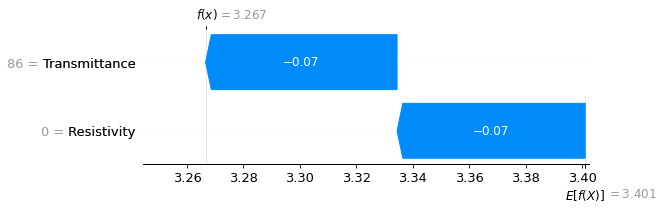

In [14]:
# 这个waterfall图好像只有xgb有用
shap.plots.waterfall(shap_values_XGB[0])

This is the plot show the base value of each features and how it will react on the model.

In [15]:
shap.plots.force(shap_values_XGB[0])
# store to image and save

The force graph only show part of the model. Here, by rotating 90 degress and stack them horizontally, we will have a more detailed sight for the entire dataset.

In [16]:
shap.plots.force(shap_values_XGB)

The bee swarm can give us an outlook of features involved in this model. It can give us an idea which feature has more influence on the model. The beeswarm plot sort the features by their influence on the model, that is, the sum of SHAP value magitituedes of samples. We can see that the most important features are the ones with the highest SHAP values while the SHAP values show the distribution of the impacts of the features.

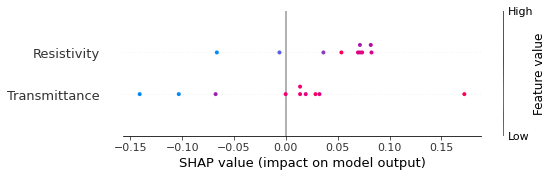

In [19]:
shap.plots.beeswarm(shap_values_XGB)

This standard bar plot shows the mean absolute value of the SHAP value of both resistiviy and transmitance.

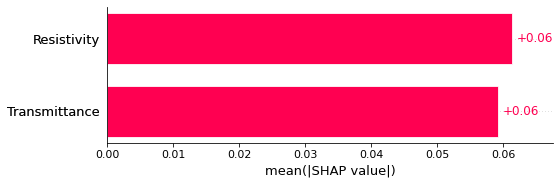

In [21]:
shap.plots.bar(shap_values_XGB)